In [1]:
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt

import seaborn as sns

import numpy as np

import pickle as pk

## Basic Statistics of data

In [2]:
data = pk.load(open('./data_numpy.pk', 'rb'))

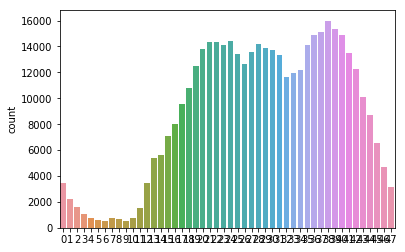

In [3]:
sns.countplot(data[:, 1] % 48)

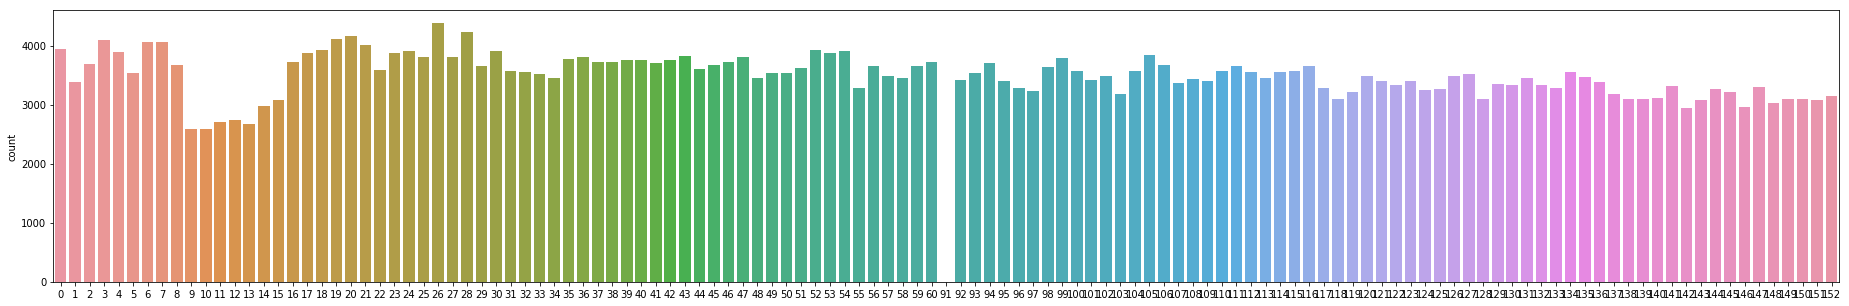

In [4]:
fig, ax = plt.subplots(figsize=(32, 5))
sns.countplot(data[:, 1] // 48, ax=ax)

## Visualize the model

In [5]:
from model import DeepFMDayTime

In [6]:
import torch
import torch.nn as nn

In [7]:
deepfm = torch.load('./deepfm_day_time_rank2_latent8.pytorch')

### Day Embedding

In [11]:
day_weights = deepfm.day_embedding.weight.cpu().detach().numpy()

In [12]:
day_weights.shape

(153, 16)

In [13]:
day_embedded = TSNE(n_components=2).fit_transform(day_weights)

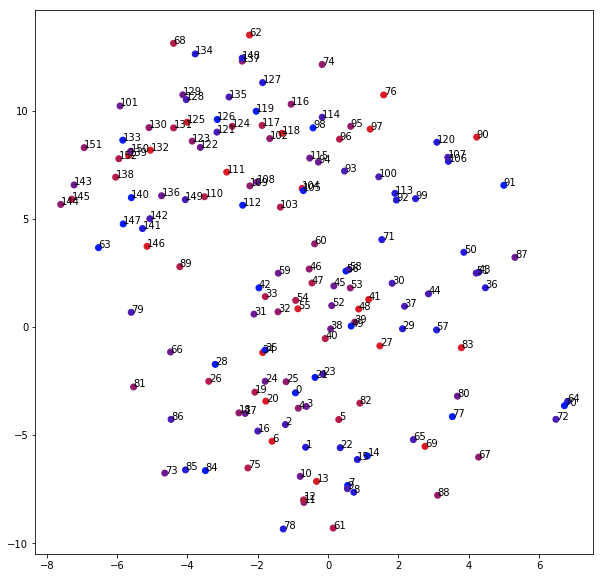

In [14]:
fig, ax = plt.subplots(figsize=(10, 10))
colors = np.zeros((day_embedded.shape[0], 3))
colors[:, 0] = (np.arange(day_embedded.shape[0]) % 7) / 7
colors[:, 1] = 0.1
colors[:, 2] = 1 - colors[:, 0]
ax.scatter(x=day_embedded[:, 0], y=day_embedded[:, 1], c=colors)
for i in range(day_embedded.shape[0]):
    ax.annotate(str(i), (day_embedded[i, 0], day_embedded[i, 1]))

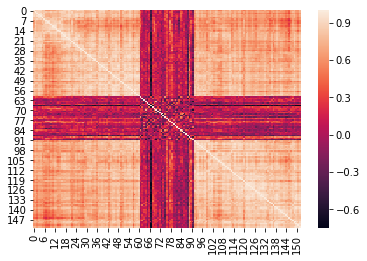

In [15]:
sns.heatmap(np.corrcoef(day_weights))

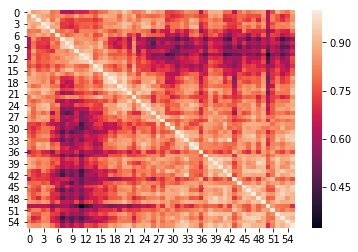

In [16]:
sns.heatmap(np.corrcoef(day_weights[:56]))

### Time Embedding

In [17]:
time_weights = deepfm.tofd_embedding.weight.cpu().detach().numpy()

In [18]:
time_weights.shape

(48, 16)

In [19]:
time_embedded = TSNE(n_components=2).fit_transform(time_weights)

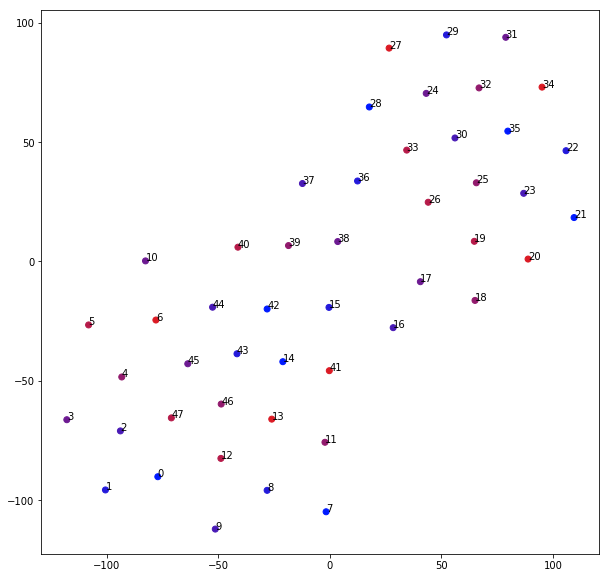

In [20]:
fig, ax = plt.subplots(figsize=(10, 10))
colors = np.zeros((time_embedded.shape[0], 3))
colors[:, 0] = (np.arange(time_embedded.shape[0]) % 7) / 7
colors[:, 1] = 0.1
colors[:, 2] = 1 - colors[:, 0]
ax.scatter(x=time_embedded[:, 0], y=time_embedded[:, 1], c=colors)
for i in range(time_embedded.shape[0]):
    ax.annotate(str(i), (time_embedded[i, 0], time_embedded[i, 1]))

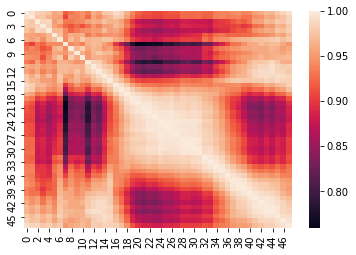

In [21]:
sns.heatmap(np.corrcoef(time_weights))